<a href="https://colab.research.google.com/github/dcthyun0308/ESAA/blob/main/YB_0919(1)_exercises_chipotle_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
df = pd.read_csv(url, sep="\t")

df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 3. Assign it to a variable called chipo.

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep="\t")

### Step 4. See the first 10 entries

In [ ]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 5. Create a histogram of the top 5 items bought

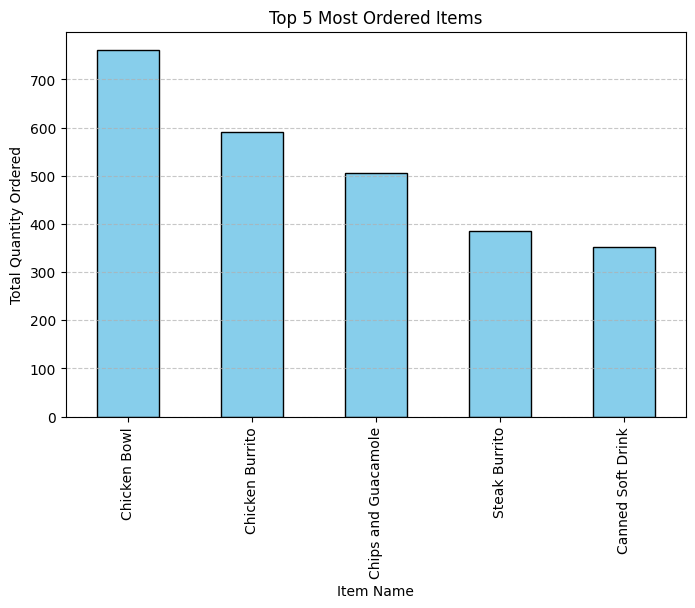

In [ ]:
top5 = df.groupby("item_name")["quantity"].sum().sort_values(ascending=False).head(5)

top5.plot(kind="bar", figsize=(8,5), color="skyblue", edgecolor="black")

plt.title("Top 5 Most Ordered Items")
plt.xlabel("Item Name")
plt.ylabel("Total Quantity Ordered")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

가장 높은 수익을 낸 메뉴

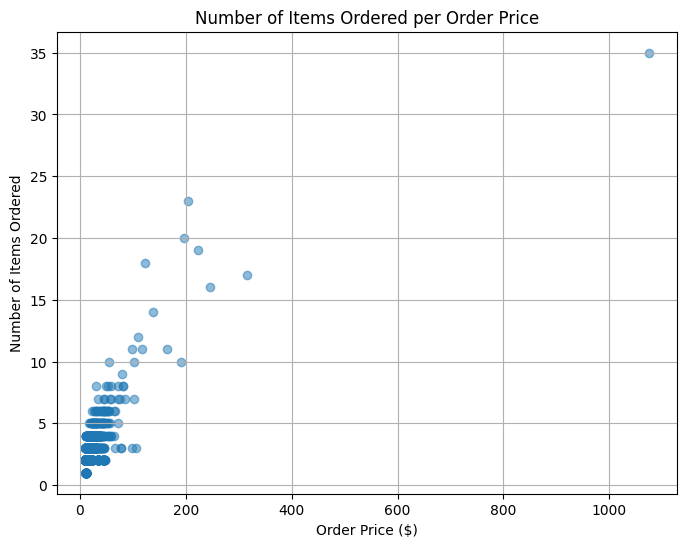

In [ ]:
df["item_price"] = df["item_price"].str.replace("$", "").astype(float)

order_summary = df.groupby("order_id").agg(
    total_price = ("item_price", lambda x: (x * df.loc[x.index, "quantity"]).sum()),
    total_items = ("quantity", "sum")
)

plt.figure(figsize=(8,6))
plt.scatter(order_summary["total_price"], order_summary["total_items"], alpha=0.5)

plt.title("Number of Items Ordered per Order Price")
plt.xlabel("Order Price ($)")
plt.ylabel("Number of Items Ordered")
plt.grid(True)
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

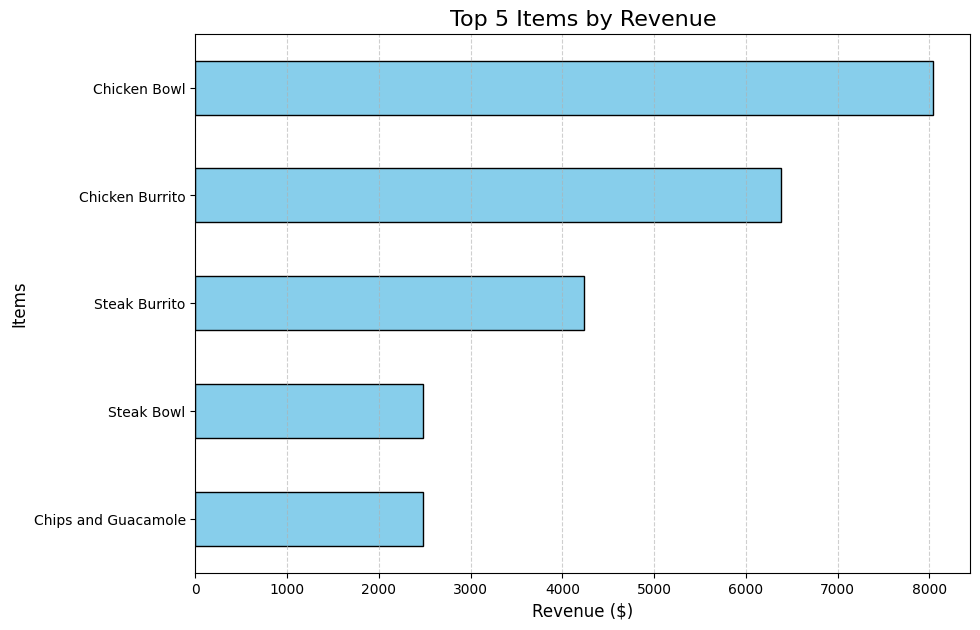

In [ ]:
import matplotlib.pyplot as plt

# 1. 'item_price' 열이 문자열(object) 타입일 경우에만 변환 작업을 수행
if chipo['item_price'].dtype == 'object':
    chipo['item_price'] = chipo['item_price'].str.replace('$', '', regex=False).astype(float)

# 2. 'revenue'(수익) 열을 새로 만듭니다.
chipo['revenue'] = chipo['quantity'] * chipo['item_price']

# 3. 'item_name'으로 그룹화하고, 각 아이템의 총 수익을 계산합니다.
revenue_by_item = chipo.groupby('item_name')['revenue'].sum()

# 4. 수익을 기준으로 내림차순 정렬하고 상위 5개를 선택합니다.
top_5_revenue = revenue_by_item.sort_values(ascending=False).head(5)

# 5. 결과를 가로 막대 그래프로 시각화합니다.
plt.figure(figsize=(10, 7))
top_5_revenue.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Top 5 Items by Revenue', fontsize=16)
plt.xlabel('Revenue ($)', fontsize=12)
plt.ylabel('Items', fontsize=12)
plt.gca().invert_yaxis()  # 가장 큰 값이 위로 오도록 정렬
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()